In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal



In [122]:
df1 = pd.read_pickle('/content/EDA_df.pkl')
df1.head()

,id,name,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,...,drama,family,kids,mystery,reality,sci-fi & fantasy,soap,talk,war & politics & news,action & adventure & western
0,71446,money heist,1.0,41,17836,8.257,False,2017-05-02,2021-12-03,False,...,1,0,0,0,0,0,0,0,0,0
1,69050,riverdale,1.0,137,13180,8.479,False,2017-01-26,2023-08-23,False,...,1,0,0,1,0,0,0,0,0,0
2,93405,squid game,1.0,9,13053,7.831,False,2021-09-17,2021-09-17,True,...,1,0,0,1,0,0,0,0,0,1
3,71712,the good doctor,1.0,116,11768,8.503,False,2017-09-25,2023-05-01,True,...,1,0,0,0,0,0,0,0,0,0
4,85271,wandavision,1.0,9,11308,8.300,False,2021-01-15,2021-03-05,False,...,1,0,0,1,0,1,0,0,0,0


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59504 entries, 0 to 59503
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            59504 non-null  int64         
 1   name                          59504 non-null  object        
 2   number_of_seasons             59504 non-null  float64       
 3   number_of_episodes            59504 non-null  int64         
 4   vote_count                    59504 non-null  int64         
 5   vote_average                  59504 non-null  float64       
 6   adult                         59504 non-null  bool          
 7   first_air_date                59504 non-null  datetime64[ns]
 8   last_air_date                 59504 non-null  datetime64[ns]
 9   in_production                 59504 non-null  bool          
 10  popularity                    59504 non-null  float64       
 11  type                        

#Feature Engineering

#Calculating Duration Between Air Dates and Extracting Year/Month Information

In [124]:
import pandas as pd
from datetime import datetime

# Sample DataFrame df1, replace it with your DataFrame
# df1 = pd.read_csv('your_data.csv')  # Replace with your actual DataFrame

# Calculate duration in months
df1['duration_months'] = ((pd.to_datetime(df1['last_air_date']).dt.year - pd.to_datetime(df1['first_air_date']).dt.year) * 12) + \
    (pd.to_datetime(df1['last_air_date']).dt.month - pd.to_datetime(df1['first_air_date']).dt.month)

# Calculate duration in years with better precision
df1['duration_years'] = (pd.to_datetime(df1['last_air_date']) - pd.to_datetime(df1['first_air_date'])).dt.total_seconds() / (60 * 60 * 24 * 365.25)

# Extract year and month from 'first_air_date' and 'last_air_date' (if needed for analysis)
df1['first_air_year'] = pd.to_datetime(df1['first_air_date']).dt.year
df1['first_air_month'] = pd.to_datetime(df1['first_air_date']).dt.month
df1['last_air_year'] = pd.to_datetime(df1['last_air_date']).dt.year
df1['last_air_month'] = pd.to_datetime(df1['last_air_date']).dt.month

# Print the columns to be added
print("Columns to be added to df1:")
print(df1[['duration_months', 'duration_years', 'first_air_year', 'first_air_month', 'last_air_year', 'last_air_month']])

# Drop the original columns: 'first_air_date' and 'last_air_date'
df1.drop(columns=['first_air_date', 'last_air_date'], inplace=True)

# Verify the updated DataFrame
print("\nUpdated DataFrame after dropping original columns:")
print(df1.head())  # Display the first few rows of the updated DataFrame



Columns to be added to df1:
       duration_months  duration_years  first_air_year  first_air_month  \
0                   55        4.588638            2017                5   
1                   79        6.570842            2017                1   
2                    0        0.000000            2021                9   
3                   68        5.596167            2017                9   
4                    2        0.134155            2021                1   
...                ...             ...             ...              ...   
59499               17        1.426420            2022                4   
59500                1        0.084873            2023               11   
59501               12        1.033416            2024                3   
59502                0        0.000000            2023               11   
59503                0        0.000000            2023               11   

       last_air_year  last_air_month  
0               2021            

#Determining Seasons Based on Air Dates

In [125]:
# Function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Determine seasons based on month for first_air_date and last_air_date
df1['first_air_season'] = df1['first_air_month'].apply(get_season)
df1['last_air_season'] = df1['last_air_month'].apply(get_season)

# Print the columns to be added (including the season columns)
print("Columns to be added to df1 with seasons:")
print(df1[['duration_months', 'duration_years', 'first_air_year', 'first_air_month', 'last_air_year', 'last_air_month', 'first_air_season', 'last_air_season']])

# Verify the updated DataFrame with the season columns
print("\nUpdated DataFrame with season columns:")
print(df1.head())  # Display the first few rows of the updated DataFrame


Columns to be added to df1 with seasons:
       duration_months  duration_years  first_air_year  first_air_month  \
0                   55        4.588638            2017                5   
1                   79        6.570842            2017                1   
2                    0        0.000000            2021                9   
3                   68        5.596167            2017                9   
4                    2        0.134155            2021                1   
...                ...             ...             ...              ...   
59499               17        1.426420            2022                4   
59500                1        0.084873            2023               11   
59501               12        1.033416            2024                3   
59502                0        0.000000            2023               11   
59503                0        0.000000            2023               11   

       last_air_year  last_air_month first_air_season last

In [126]:
df1.shape

(59504, 59)

#WORD CLOUD

In [127]:
import nltk
from wordcloud import WordCloud

In [128]:
name=df1['name'].astype('string')
name

,name
0,money heist
1,riverdale
2,squid game
3,the good doctor
4,wandavision
...,...
59499,take my muffin
59500,jhanak
59501,born to be y
59502,jokah & tutty


Generating a Word Cloud from the 'Name' Column Data

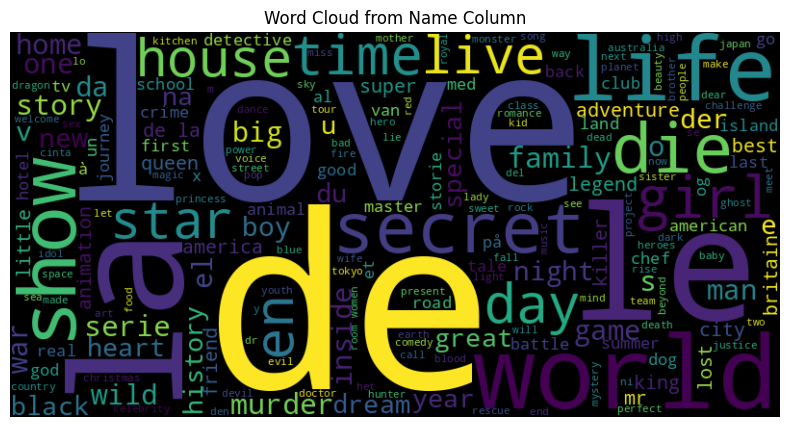

In [129]:
#creating the word cloud
name_data = name.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(name_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Name Column")
plt.show()

In [130]:
import pandas as pd
from collections import Counter

# Example DataFrame (replace 'df' with your actual DataFrame)
# df = your_dataframe

# Step 1: Tokenize the words in the 'name' column
df1['name'] = df1['name'].str.lower()  # Convert to lowercase to avoid case-sensitivity issues
words = df1['name'].str.split()  # Split each name into words

# Step 2: Flatten the list of words and count the frequency of each word
all_words = [word for sublist in words for word in sublist]  # Flatten the list of words
word_counts = Counter(all_words)  # Count word frequency

# Step 3: Define the specific words you're interested in
words_to_check = ['love', 'world', 'show','family','life']

# Step 4: Get the count of each of the specific words
word_counts_check = {word: word_counts[word] for word in words_to_check}

print("Value count for specific words:", word_counts_check)

# Step 5: Create dummy variables for the specific words
for word in words_to_check:
    df1[f'name_{word}'] = df1['name'].apply(lambda x: 1 if word in x.split() else 0)

# Step 6: Check the resulting DataFrame
print(df1[['name'] + [f'name_{word}' for word in words_to_check]].head())


Value count for specific words: {'love': 1103, 'world': 415, 'show': 366, 'family': 237, 'life': 422}
              name  name_love  name_world  name_show  name_family  name_life
0      money heist          0           0          0            0          0
1        riverdale          0           0          0            0          0
2       squid game          0           0          0            0          0
3  the good doctor          0           0          0            0          0
4      wandavision          0           0          0            0          0


In [131]:
df1.shape

(59504, 64)

In [132]:

df1.drop(columns=['name'], inplace=True)

print(df1.head())

      id  number_of_seasons  number_of_episodes  vote_count  vote_average  \
0  71446                1.0                  41       17836         8.257   
1  69050                1.0                 137       13180         8.479   
2  93405                1.0                   9       13053         7.831   
3  71712                1.0                 116       11768         8.503   
4  85271                1.0                   9       11308         8.300   

   adult  in_production  popularity        type            status  ...  \
0  False          False      96.354    scripted             ended  ...   
1  False          False     143.750    scripted             ended  ...   
2  False           True     115.587    scripted  returning series  ...   
3  False           True     681.614    scripted  returning series  ...   
4  False          False      62.893  miniseries             ended  ...   

   first_air_month  last_air_year  last_air_month  first_air_season  \
0                5   

#Overview column

Creating Dummy Variables for Specific Words in the 'Overview' Column and Merging with Modified Sentiment Columns

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal




In [134]:
# Load the DataFrame from the pickle file
df2 = pd.read_pickle('/content/df_with_sentiment_and_overview.pkl')

# Display the first few rows of the DataFrame
print(df2.head())


      id                                           overview  polarity  \
0  71446  to carry out the biggest heist in history, a m... -0.046032   
1  69050  set in the present, the series offers a bold, ...  0.144444   
2  93405  hundreds of cash-strapped players accept a str...  0.055000   
3  71712  shaun murphy, a young surgeon with autism and ... -0.011111   
4  85271  wanda maximoff and vision—two super-powered be...  0.000000   

   subjectivity sentiment  
0      0.560317        -1  
1      0.222222         1  
2      0.345000         1  
3      0.422222        -1  
4      0.000000         0  


The 'df_with_sentiment_and_overview.pkl' presents the sentiment analysis of the 'overview' column in the TV show dataset. The analysis utilizes the TextBlob library to extract the polarity and subjectivity of each overview text, allowing us to categorize the sentiment into three types: positive, neutral, and negative.

In [135]:
text=df2['overview'].astype('string')
text

,overview
0,"to carry out the biggest heist in history, a m..."
1,"set in the present, the series offers a bold, ..."
2,hundreds of cash-strapped players accept a str...
3,"shaun murphy, a young surgeon with autism and ..."
4,wanda maximoff and vision—two super-powered be...
...,...
59499,the story is about a unicorn who has lost his ...
59500,No overview available
59501,the story of 14 contestants who audition to co...
59502,No overview available


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 Most Common Words:
[('life', 5754), ('series', 5251), ('one', 4551), ('love', 4488), ('new', 4251), ('world', 4047), ('story', 3802), ('family', 3529), ('two', 3139), ('people', 2841)]


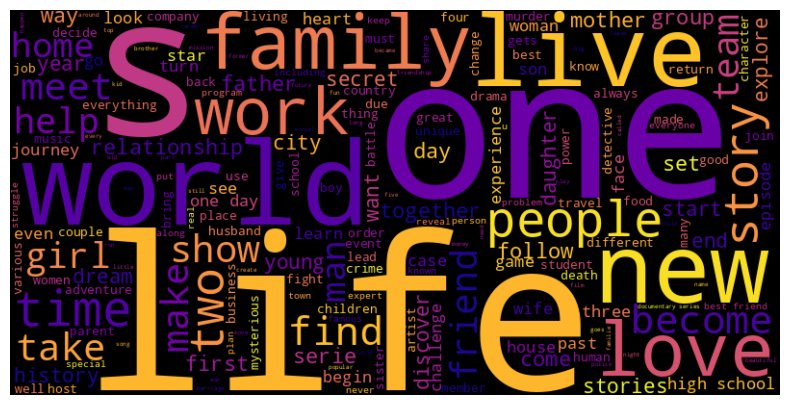

In [136]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' is a pandas Series with your 'overview' column
# Sample text data
# text = pd.Series([...])

# Download necessary resources from NLTK
nltk.download('stopwords')

# Convert the 'overview' column to lowercase
text = text.str.lower()

# Remove punctuation by using string.punctuation
text = text.str.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords and specific words ("available" and "overview")
stop_words = set(stopwords.words('english')) | {"available", "overview"}  # Add "available" and "overview" to the stopwords set
filtered_text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Combine the filtered text into a single string
text_data = filtered_text.str.cat(sep=' ')

# Count word frequencies using nltk.FreqDist
word_tokens = text_data.split()
freq_dist = nltk.FreqDist(word_tokens)


# Show the 10 most common words
print("\nTop 10 Most Common Words:")
print(freq_dist.most_common(10))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Word Frequency Analysis in TV Show Overviews

In [137]:
import pandas as pd
from collections import Counter
import re

# Assuming df is already defined and contains the data you provided earlier
# Step 1: Handle NaN values and tokenize the words in the 'overview' column
df2['overview'] = df2['overview'].fillna('').str.lower()  # Handle NaN and convert to lowercase

# Step 2: Clean text to remove punctuation and extra spaces (optional, but ensures better matching)
df2['overview'] = df2['overview'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation

# Step 3: Split the overview into words
words = df2['overview'].str.split()  # Split each overview into words

# Step 4: Flatten the list of words and count the frequency of each word in the entire dataset
all_words = [word for sublist in words for word in sublist]  # Flatten the list of words
word_counts = Counter(all_words)  # Count word frequency

# Step 5: Define the specific words you're interested in
words_to_check = ['love', 'world', 'family', 'life', 'story']

# Step 6: Create columns for the frequency count of each word in the 'overview' column
for word in words_to_check:
    df2[f'overview_{word}'] = df2['overview'].apply(lambda x: x.split().count(word))

# Step 6: Count how many times each word in 'words_to_check' appears across all overviews
word_counts = {word: all_words.count(word) for word in words_to_check}

# Sort the dictionary by its values in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Step 7: Print the value counts for the specific words
print("Value count for specific words:", sorted_word_counts)

# Step 7: Add the 'id' column to df for merging and checking
df2_overview = df2[['id', 'overview'] + [f'overview_{word}' for word in words_to_check]]

# Step 8: Check the resulting df DataFrame
print(df2_overview.head())


Value count for specific words: {'life': 5769, 'love': 4514, 'world': 4060, 'story': 3810, 'family': 3532}
      id                                           overview  overview_love  \
0  71446  to carry out the biggest heist in history a my...              0   
1  69050  set in the present the series offers a bold su...              0   
2  93405  hundreds of cashstrapped players accept a stra...              0   
3  71712  shaun murphy a young surgeon with autism and s...              0   
4  85271  wanda maximoff and visiontwo superpowered bein...              0   

   overview_world  overview_family  overview_life  overview_story  
0               0                0              0               0  
1               0                0              1               0  
2               0                0              0               0  
3               0                0              1               0  
4               0                0              0               0  


In [138]:
df2_overview = df2_overview.merge(df2[['id', 'polarity', 'subjectivity', 'sentiment']], on='id', how='left')

# Step 10: Check the resulting df DataFrame
print(df2_overview.head())


      id                                           overview  overview_love  \
0  71446  to carry out the biggest heist in history a my...              0   
1  69050  set in the present the series offers a bold su...              0   
2  93405  hundreds of cashstrapped players accept a stra...              0   
3  71712  shaun murphy a young surgeon with autism and s...              0   
4  85271  wanda maximoff and visiontwo superpowered bein...              0   

   overview_world  overview_family  overview_life  overview_story  polarity  \
0               0                0              0               0 -0.046032   
1               0                0              1               0  0.144444   
2               0                0              0               0  0.055000   
3               0                0              1               0 -0.011111   
4               0                0              0               0  0.000000   

   subjectivity sentiment  
0      0.560317        -1  


#Merge New Columns from 'Overview' Analysis into the df1 Dataset

In [139]:
df1 = df1.merge(df2, on='id', how='left')
print(df1.head())

      id  number_of_seasons  number_of_episodes  vote_count  vote_average  \
0  71446                1.0                  41       17836         8.257   
1  69050                1.0                 137       13180         8.479   
2  93405                1.0                   9       13053         7.831   
3  71712                1.0                 116       11768         8.503   
4  85271                1.0                   9       11308         8.300   

   adult  in_production  popularity        type            status  ...  \
0  False          False      96.354    scripted             ended  ...   
1  False          False     143.750    scripted             ended  ...   
2  False           True     115.587    scripted  returning series  ...   
3  False           True     681.614    scripted  returning series  ...   
4  False          False      62.893  miniseries             ended  ...   

   name_life                                           overview  polarity  \
0          0  t

In [140]:
df1.shape

(59504, 72)

In [141]:
df1=df1.drop(columns=['overview'])

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59504 entries, 0 to 59503
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            59504 non-null  int64   
 1   number_of_seasons             59504 non-null  float64 
 2   number_of_episodes            59504 non-null  int64   
 3   vote_count                    59504 non-null  int64   
 4   vote_average                  59504 non-null  float64 
 5   adult                         59504 non-null  bool    
 6   in_production                 59504 non-null  bool    
 7   popularity                    59504 non-null  float64 
 8   type                          59504 non-null  category
 9   status                        59504 non-null  category
 10  origin_country                59504 non-null  int64   
 11  production_companies          59504 non-null  int64   
 12  episode_run_time              59504 non-null  

#Hyperparameters
#Multivariable Analysis

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

In [144]:
y=df1['popularity']
X = df1.drop(columns=['popularity'])

#LabelEncoder

In [145]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical columns in X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()               # Create LabelEncoder for each column
    X[col] = le.fit_transform(X[col])  # Transform the categorical column into numeric
    label_encoders[col] = le          # Store the encoder (in case you need to reverse later)

# Check the transformation
print(X[categorical_cols].head())


   type  status  first_air_season  last_air_season  sentiment
0     4       1                 1                3          0
1     4       1                 3                2          2
2     4       5                 0                0          2
3     4       5                 0                1          0
4     1       1                 3                1          1


In [146]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import pandas as pd
import numpy as np

# Fit models and determine if a feature is selected (1) or not (0)

# Lasso Regression
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)


# Ridge Regression
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)


# Gradient Boosting
gb = GradientBoostingRegressor().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

# Random Forest
rf = RandomForestRegressor().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)


# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso',  'GradientBoost', 'RandomForest', 'Ridge']].sum(axis=1)

# Output the results
print(selection_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.587e+07, tolerance: 1.297e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.49882e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


               Feature  Lasso  GradientBoost  RandomForest  Ridge  Sum
0                   id      1              1             1      1    4
1    number_of_seasons      0              0             0      0    0
2   number_of_episodes      1              1             1      1    4
3           vote_count      1              1             1      1    4
4         vote_average      1              1             1      1    4
..                 ...    ...            ...           ...    ...  ...
65       overview_love      1              0             1      1    3
66      overview_world      0              0             1      1    2
67     overview_family      1              1             1      1    4
68       overview_life      0              1             1      1    3
69      overview_story      1              1             1      1    4

[70 rows x 6 columns]


#Creating DataFrame with most valuable variables

Selected variables - recommended 4 models

In [147]:
 #Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 4]['Feature'].tolist()
df_model = df1[final_var].copy()
df_model['popularity'] = df1['popularity'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59504 entries, 0 to 59503
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            59504 non-null  int64   
 1   number_of_episodes            59504 non-null  int64   
 2   vote_count                    59504 non-null  int64   
 3   vote_average                  59504 non-null  float64 
 4   type                          59504 non-null  category
 5   status                        59504 non-null  category
 6   origin_country                59504 non-null  int64   
 7   production_companies          59504 non-null  int64   
 8   episode_run_time              59504 non-null  int64   
 9   en                            59504 non-null  int64   
 10  zh                            59504 non-null  int64   
 11  nl                            59504 non-null  int64   
 12  hi                            59504 non-null  

After performing hyperparameter tuning and evaluating the model's performance, 34 features have been selected as the most important, passing all four analyses (Lasso, Ridge, Gradient Boosting, and Random Forest). These features are now deemed crucial for building an optimized model for 'popularity' prediction. The selected features have been validated through different algorithms to ensure robustness and consistency in their relevance.

In [148]:
# Save the df DataFrame to a pickle file
df1.to_pickle('df_model.pkl')


In [149]:


# Save the DataFrame as a pickle file
df_model.to_pickle('df_model.pkl')  # Saves the DataFrame to a pickle file named 'df_model.pkl'

print("DataFrame has been saved as pickle.")


DataFrame has been saved as pickle.
